In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# Step 1

In [27]:
# Step 1: Verify the Current Working Directory
# Display the current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current directory to check for Medicalpremium.csv
print("\nFiles in Current Directory:")
print(os.listdir('.'))

# Step 2: Set the Working Directory
# Set to the folder containing Medicalpremium.csv
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("\nWorking Directory Changed to:", os.getcwd())
    
    # Verify files in the new directory
    print("\nFiles in New Directory:")
    files = os.listdir('.')
    print(files)
    
    # Check if Medicalpremium.csv is present
    if 'Medicalpremium.csv' in files:
        print("\nConfirmed: 'Medicalpremium.csv' found in the directory.")
    else:
        print("\nWarning: 'Medicalpremium.csv' not found in the directory.")
        print("Please verify the file name and location.")
except FileNotFoundError:
    print("\nError: The directory 'C:\\Users\\Lewis\\Documents\\Project' does not exist.")
    print("Please verify the path and ensure the folder exists.")
except PermissionError:
    print("\nError: Permission denied for 'C:\\Users\\Lewis\\Documents\\Project'.")
    print("Check folder permissions or move the file to an accessible location.")
except Exception as e:
    print(f"\nError: An unexpected issue occurred: {e}")

# Step 3: Load the File
try:
    # Load the CSV file
    df = pd.read_csv('Medicalpremium.csv')
    print("\nFile Loaded Successfully. First 5 Rows:")
    print(df.head())
    print("\nDataset Info:")
    print(df.info())
except FileNotFoundError:
    print("\nError: 'Medicalpremium.csv' not found in 'C:\\Users\\Lewis\\Documents\\Project'.")
    print("Please verify the file name and location.")
    print("As a fallback, trying to load with the full path...")
    try:
        # Attempt to load with the full path
        df = pd.read_csv(r'C:\Users\Lewis\Documents\Project\Medicalpremium.csv')
        print("\nFile Loaded Successfully with Full Path. First 5 Rows:")
        print(df.head())
        print("\nDataset Info:")
        print(df.info())
    except FileNotFoundError:
        print("\nError: 'Medicalpremium.csv' still not found.")
        print("Please check the file name, location, or move it to the working directory.")
    except Exception as e:
        print(f"\nError: An unexpected issue occurred with full path: {e}")
except Exception as e:
    print(f"\nError: An unexpected issue occurred while loading the file: {e}")

Current Working Directory: C:\Users\Lewis\Documents\Project

Files in Current Directory:
['correlation_matrix.csv', 'Medical Premium Project.py', 'Medicalpremium.csv', 'output', 'plots']

Working Directory Changed to: C:\Users\Lewis\Documents\Project

Files in New Directory:
['correlation_matrix.csv', 'Medical Premium Project.py', 'Medicalpremium.csv', 'output', 'plots']

Confirmed: 'Medicalpremium.csv' found in the directory.

File Loaded Successfully. First 5 Rows:
   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInF

# Step 2

Working Directory Set to: C:\Users\Lewis\Documents\Project

First 5 Rows of the Dataset:
   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                    

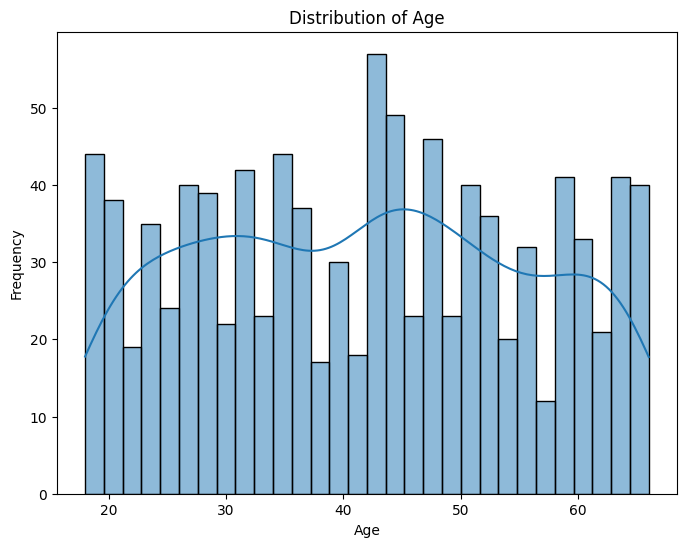

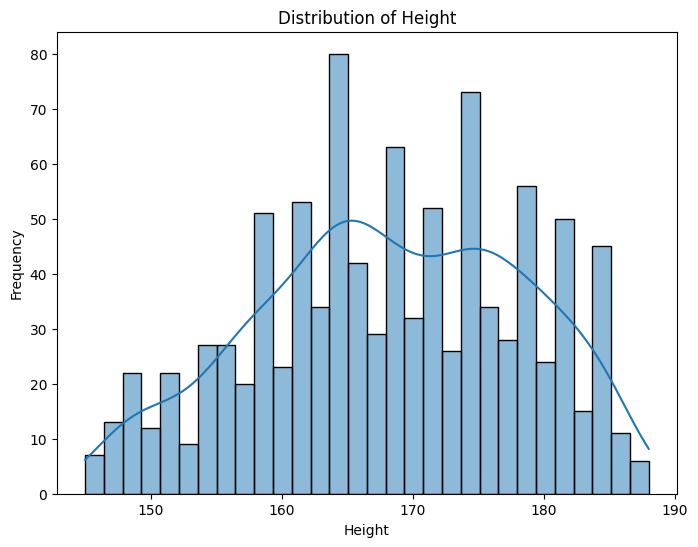

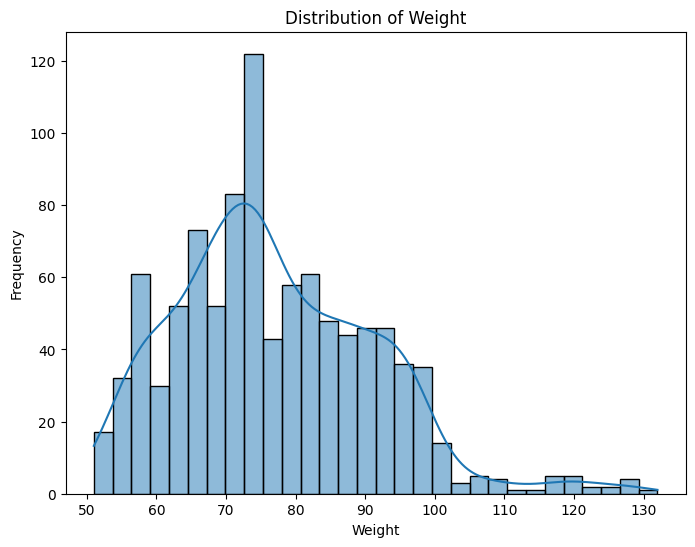

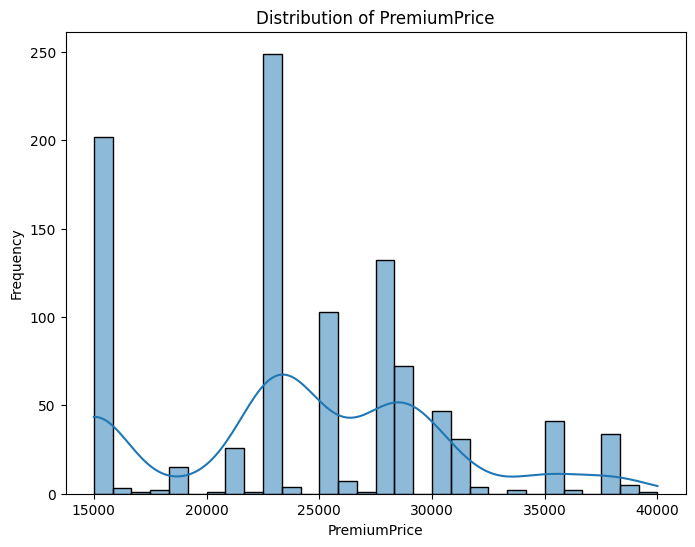

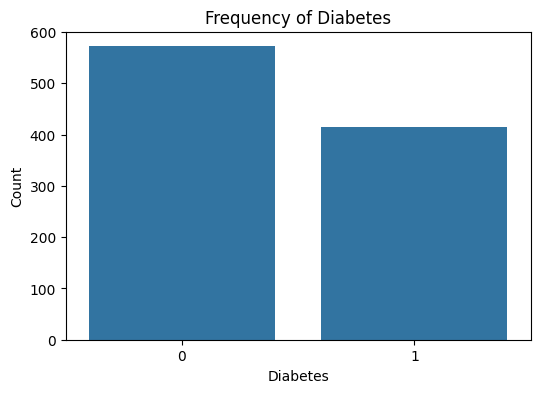

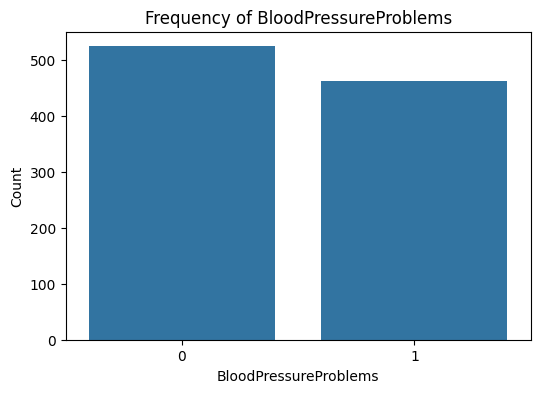

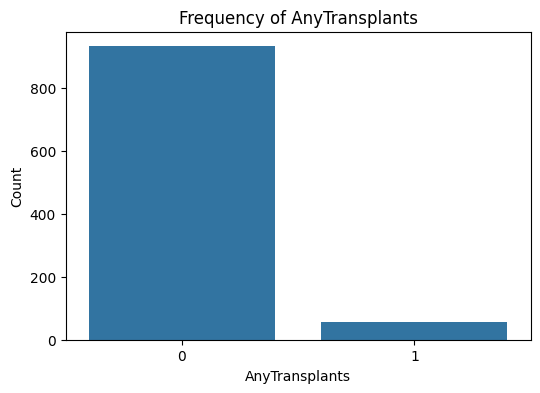

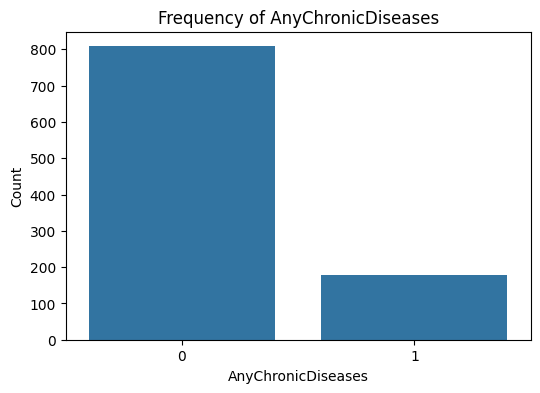

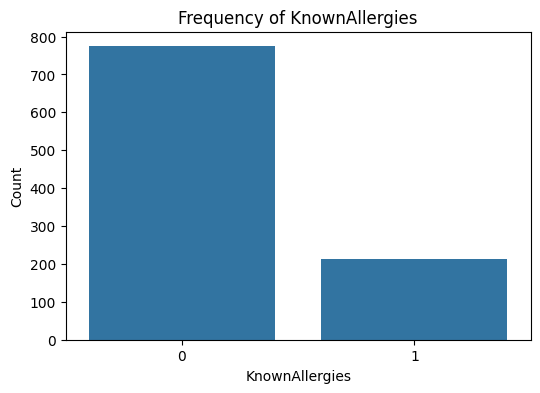

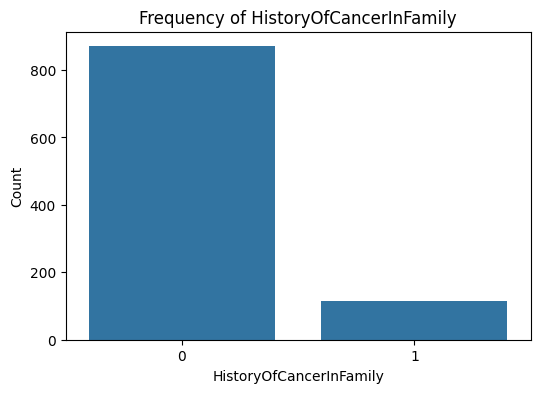

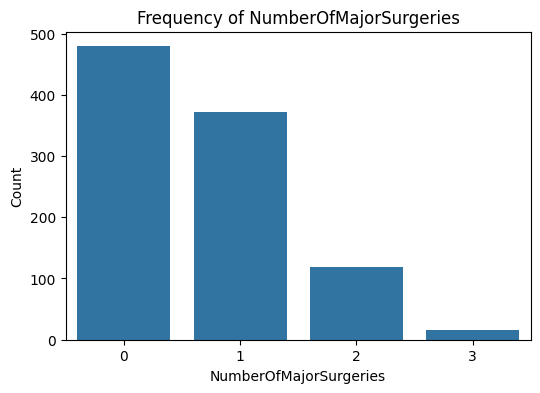


Summary Statistics for BMI:
count    986.000000
mean      27.460709
std        5.878671
min       15.156281
25%       23.393392
50%       27.156602
75%       30.759870
max       50.000000
Name: BMI, dtype: float64


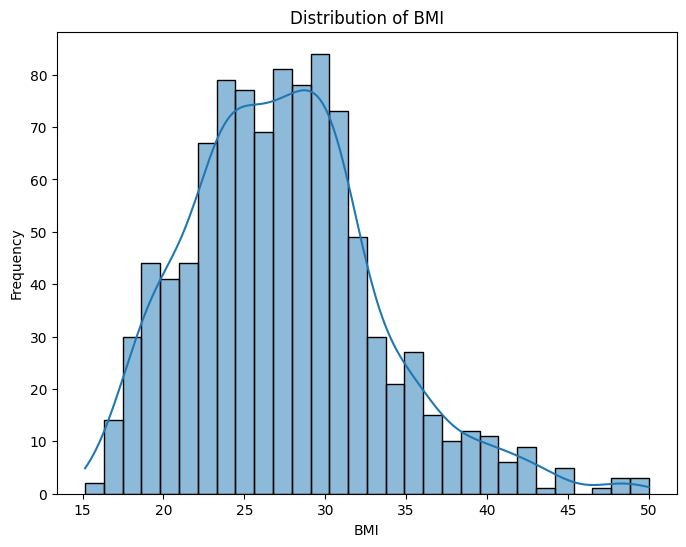


Frequency Table for Surgeries_Cat:
Surgeries_Cat
0     479
1     372
2+    135
Name: count, dtype: int64


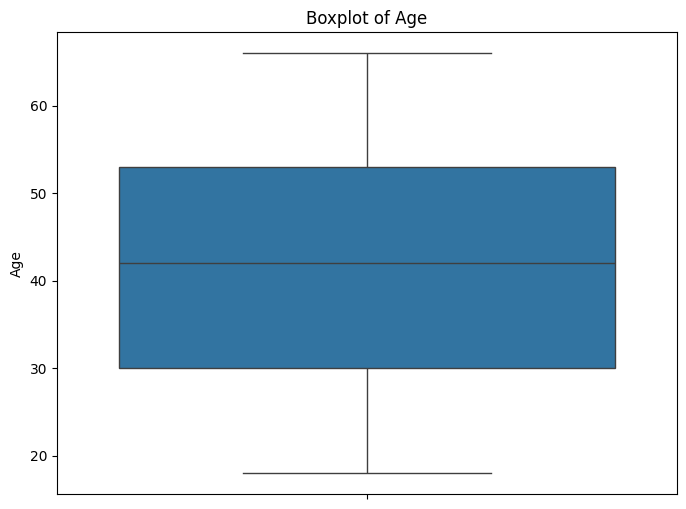

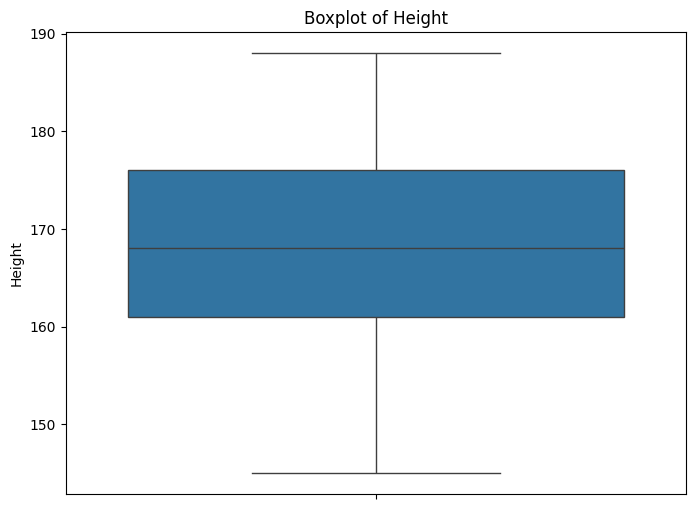

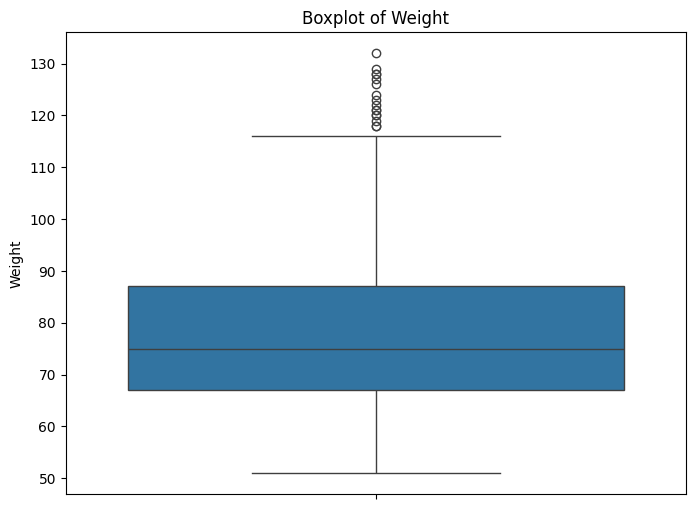

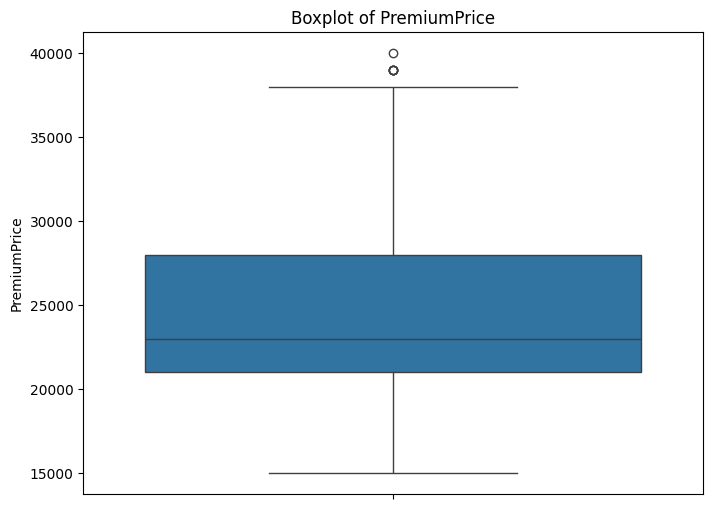

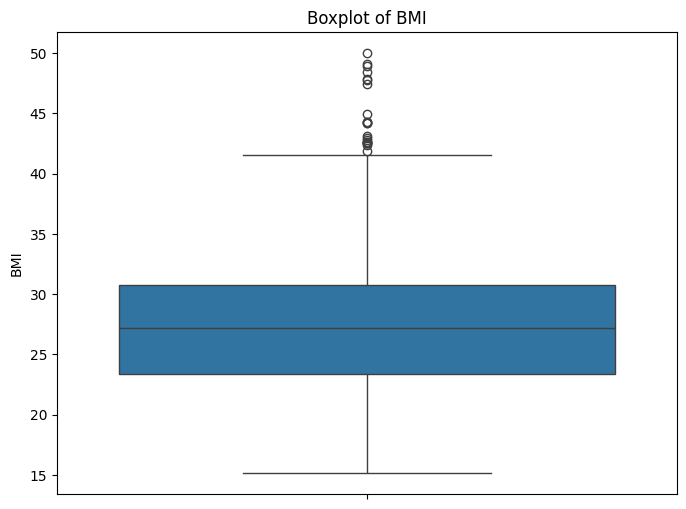


Outliers in Age:
Series([], Name: Age, dtype: int64)

Outliers in Height:
Series([], Name: Height, dtype: int64)

Outliers in Weight:
154    118
158    121
183    119
186    129
192    127
195    132
196    120
203    128
204    120
207    123
217    126
218    121
221    118
225    128
227    124
228    122
Name: Weight, dtype: int64

Outliers in PremiumPrice:
204    39000
295    40000
926    39000
928    39000
976    39000
984    39000
Name: PremiumPrice, dtype: int64

Outliers in BMI:
24     42.541994
26     42.541994
99     44.284149
133    42.666667
154    47.872125
158    48.469797
175    44.200579
183    48.898751
186    43.102008
187    44.220861
192    47.800068
195    49.077930
203    42.767884
204    47.466477
209    42.968750
218    44.988102
225    50.000000
228    44.273479
766    42.340435
775    41.890005
789    42.666667
796    42.541994
Name: BMI, dtype: float64

Note: Outlier capping deferred until after EDA to assess validity.

Preprocessed Data Saved to 'output\me

In [28]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\\Project' not found.")
    exit()

# 2.1 Load the Data
try:
    df = pd.read_csv('Medicalpremium.csv')
    print("\nFirst 5 Rows of the Dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'Medicalpremium.csv' not found.")
    exit()

# 2.2 Inspect the Data
print("\nDataset Shape:", df.shape)
print("\nData Types and Non-Null Counts:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())
print("\nSummary Statistics for Continuous Variables:")
print(df[['Age', 'Height', 'Weight', 'PremiumPrice']].describe())
binary_vars = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 
               'KnownAllergies', 'HistoryOfCancerInFamily']
print("\nFrequency Tables for Binary Variables:")
for var in binary_vars:
    print(f"\n{var}:")
    print(df[var].value_counts(normalize=True))
print("\nFrequency Table for NumberOfMajorSurgeries:")
print(df['NumberOfMajorSurgeries'].value_counts().sort_index())

# 2.3 Handle Missing Values
continuous_vars = ['Age', 'Height', 'Weight', 'PremiumPrice']
for var in continuous_vars:
    if df[var].isnull().sum() > 0:
        median_value = df[var].median()
        df[var].fillna(median_value, inplace=True)
        print(f"\nImputed missing values in {var} with median: {median_value}")
for var in binary_vars:
    if df[var].isnull().sum() > 0:
        mode_value = df[var].mode()[0]
        df[var].fillna(mode_value, inplace=True)
        print(f"\nImputed missing values in {var} with mode: {mode_value}")
if df['NumberOfMajorSurgeries'].isnull().sum() > 0:
    mode_value = df['NumberOfMajorSurgeries'].mode()[0]
    df['NumberOfMajorSurgeries'].fillna(mode_value, inplace=True)
    print(f"\nImputed missing values in NumberOfMajorSurgeries with mode: {mode_value}")
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# 2.4 Explore Data Distributions
# Create output directory for plots (optional)
save_plots = True  # Set to False to skip saving
output_dir = 'output'
if save_plots:
    try:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print(f"\nOutput directory '{output_dir}' created or exists.")
    except PermissionError:
        print(f"\nError: Cannot create '{output_dir}' due to permission issues.")
        print("Plots will be displayed inline only.")
        save_plots = False

# Histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    if save_plots:
        try:
            plt.savefig(os.path.join(output_dir, f'hist_{var}.png'))
        except PermissionError:
            print(f"\nWarning: Cannot save 'hist_{var}.png' due to permission issues.")
    plt.show()  # Display inline
    plt.close()

# Bar plots for binary variables
for var in binary_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    if save_plots:
        try:
            plt.savefig(os.path.join(output_dir, f'bar_{var}.png'))
        except PermissionError:
            print(f"\nWarning: Cannot save 'bar_{var}.png' due to permission issues.")
    plt.show()  # Display inline
    plt.close()

# Bar plot for NumberOfMajorSurgeries
plt.figure(figsize=(6, 4))
sns.countplot(x='NumberOfMajorSurgeries', data=df)
plt.title('Frequency of NumberOfMajorSurgeries')
plt.xlabel('NumberOfMajorSurgeries')
plt.ylabel('Count')
if save_plots:
    try:
        plt.savefig(os.path.join(output_dir, 'bar_NumberOfMajorSurgeries.png'))
    except PermissionError:
        print(f"\nWarning: Cannot save 'bar_NumberOfMajorSurgeries.png' due to permission issues.")
plt.show()  # Display inline
plt.close()

# 2.5 Feature Engineering
# Calculate BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
print("\nSummary Statistics for BMI:")
print(df['BMI'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
if save_plots:
    try:
        plt.savefig(os.path.join(output_dir, 'hist_BMI.png'))
    except PermissionError:
        print(f"\nWarning: Cannot save 'hist_BMI.png' due to permission issues.")
plt.show()  # Display inline
plt.close()

# Categorize NumberOfMajorSurgeries
df['Surgeries_Cat'] = pd.cut(df['NumberOfMajorSurgeries'], bins=[-1, 0, 1, float('inf')], 
                             labels=['0', '1', '2+'])
print("\nFrequency Table for Surgeries_Cat:")
print(df['Surgeries_Cat'].value_counts())

# 2.6 Check for Outliers
# Boxplots for continuous variables (including BMI)
continuous_vars.append('BMI')
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)
    if save_plots:
        try:
            plt.savefig(os.path.join(output_dir, f'box_{var}.png'))
        except PermissionError:
            print(f"\nWarning: Cannot save 'box_{var}.png' due to permission issues.")
    plt.show()  # Display inline
    plt.close()

# Identify outliers using IQR method
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    print(f"\nOutliers in {var}:")
    print(outliers)

# Defer capping until after EDA (Step 3) to validate outliers
print("\nNote: Outlier capping deferred until after EDA to assess validity.")

# 2.7 Save the Preprocessed Data
try:
    df.to_csv(os.path.join(output_dir, 'medicalpremium_preprocessed.csv'), index=False)
    print(f"\nPreprocessed Data Saved to '{os.path.join(output_dir, 'medicalpremium_preprocessed.csv')}'")
except PermissionError:
    print(f"\nError: Cannot save 'medicalpremium_preprocessed.csv' due to permission issues.")
    print("DataFrame available in memory; copy manually or try alternative path.")
except Exception as e:
    print(f"\nError: Unexpected issue saving 'medicalpremium_preprocessed.csv': {e}")
print("\nFinal Dataset Info:")
print(df.info())

# Step 3

Working Directory Set to: C:\Users\Lewis\Documents\Project

Preprocessed Dataset Loaded Successfully. Shape: (986, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    float64
 12  

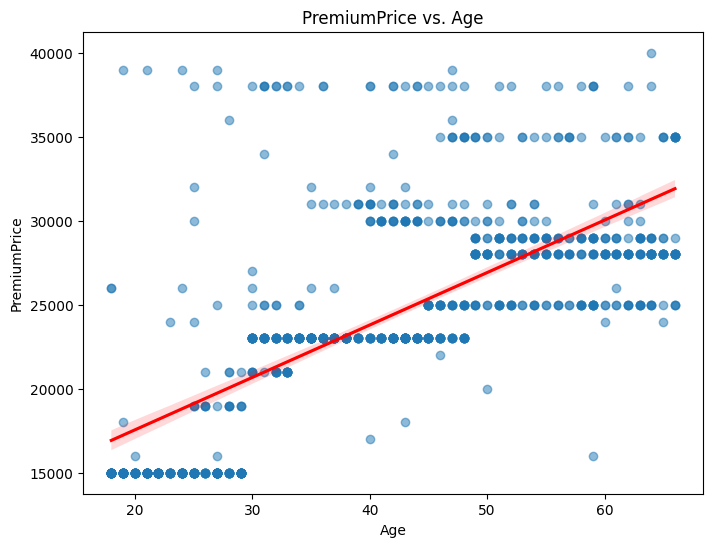

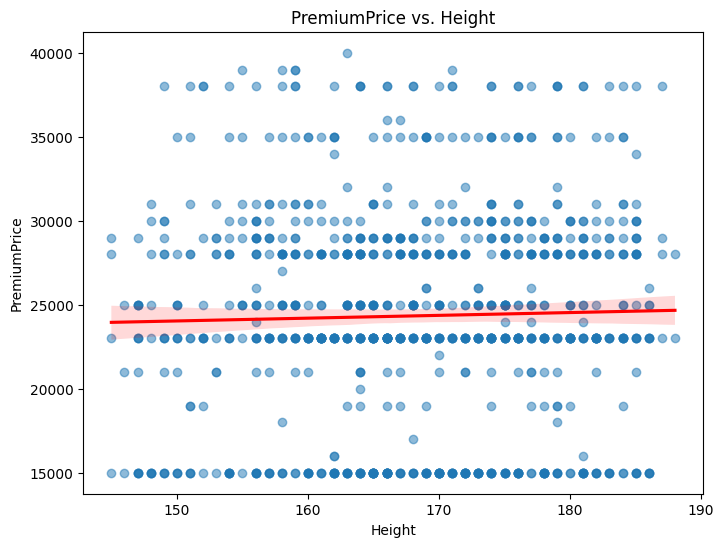

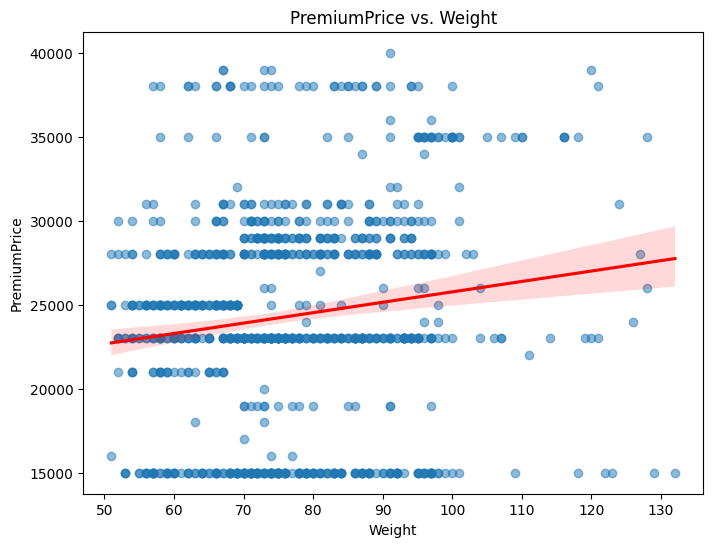

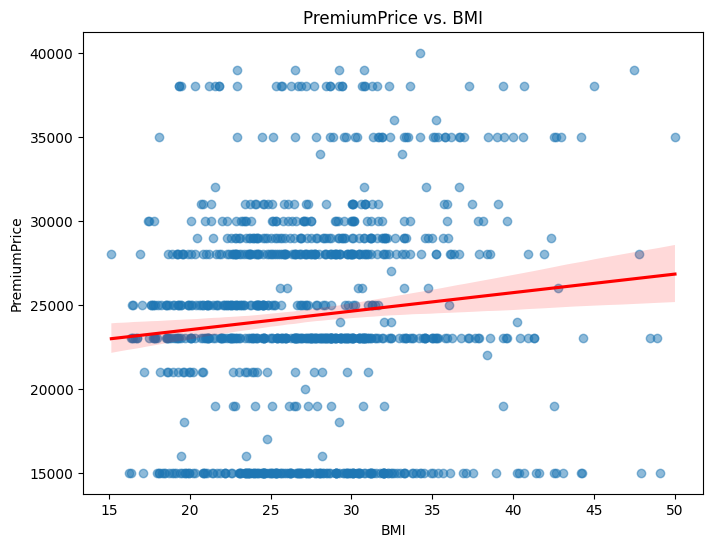

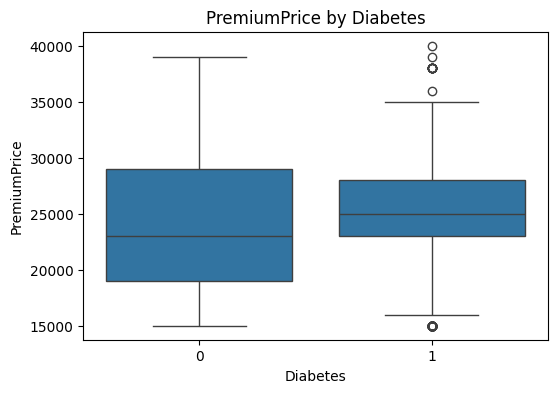

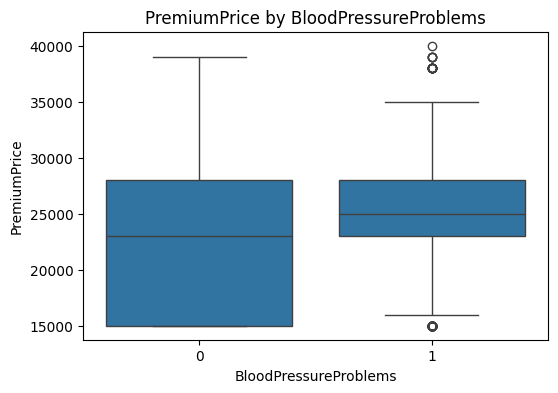

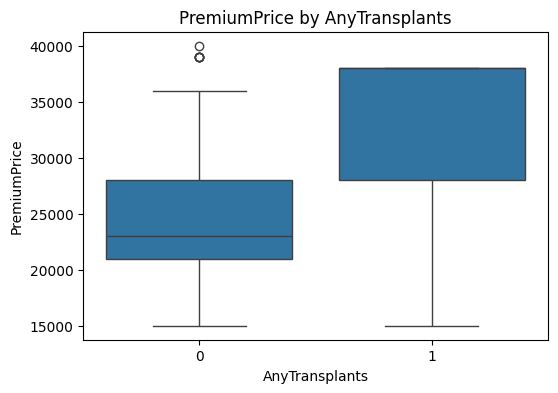

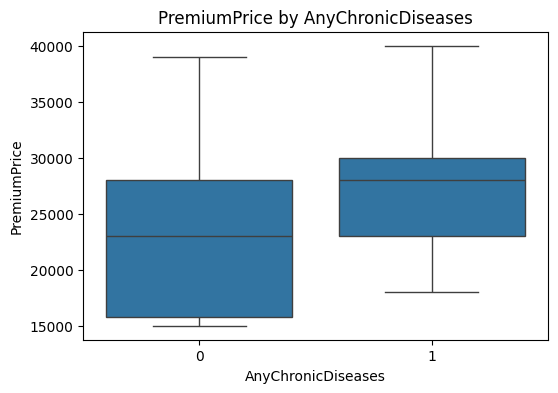

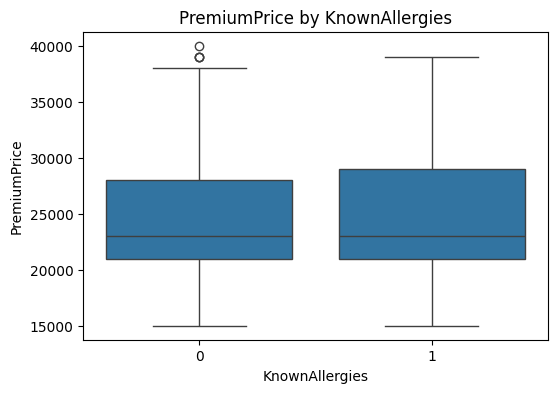

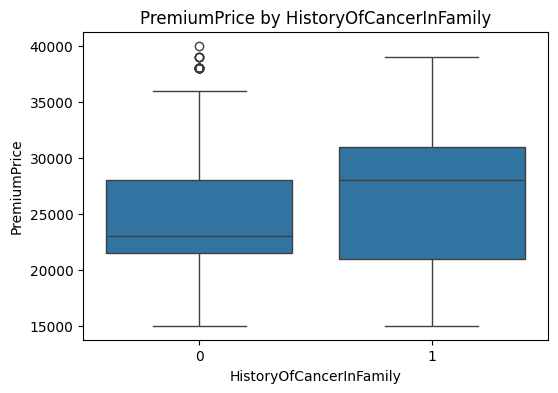

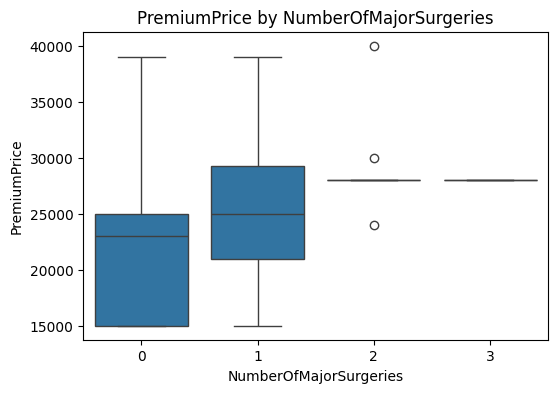

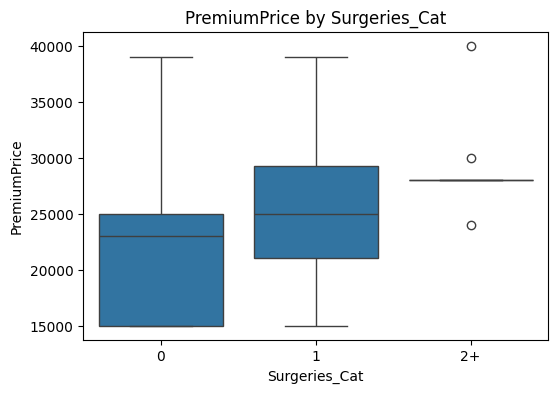


Correlation Matrix for Continuous Variables:
                   Age    Height    Weight       BMI  PremiumPrice
Age           1.000000  0.039879 -0.018590 -0.042027      0.697540
Height        0.039879  1.000000  0.066946 -0.504947      0.026910
Weight       -0.018590  0.066946  1.000000  0.820679      0.141507
BMI          -0.042027 -0.504947  0.820679  1.000000      0.103812
PremiumPrice  0.697540  0.026910  0.141507  0.103812      1.000000


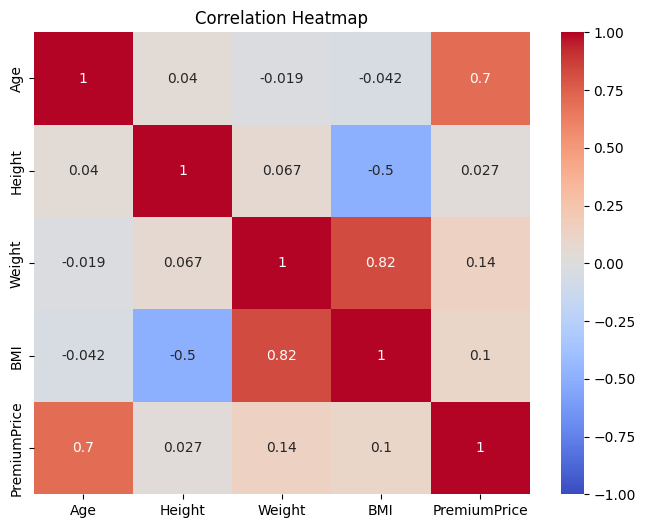


Correlation Matrix Saved to 'output\correlation_matrix.csv'

Point-Biserial Correlations with PremiumPrice:
Diabetes: Correlation = 0.076, p-value = 0.017
BloodPressureProblems: Correlation = 0.167, p-value = 0.000
AnyTransplants: Correlation = 0.289, p-value = 0.000
AnyChronicDiseases: Correlation = 0.209, p-value = 0.000
KnownAllergies: Correlation = 0.012, p-value = 0.704
HistoryOfCancerInFamily: Correlation = 0.083, p-value = 0.009

EDA Summary:
- Scatter plots: Check for non-linear patterns (e.g., Age may show quadratic trend).
- Boxplots: Identify significant binary predictors (e.g., AnyTransplants, AnyChronicDiseases).
- Correlations: Assess multicollinearity (e.g., Height, Weight, BMI) and key predictors.
- Outliers: Review scatter and boxplots to validate high/low values (e.g., PremiumPrice > 35000).
Plots and CSV saved in 'output' directory for report.

Outliers in Weight (with PremiumPrice):
     Weight  PremiumPrice
154     118         15000
158     121         23000
183  

In [29]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\\Project' not found.")
    exit()

# Load the preprocessed dataset
try:
    # Try loading preprocessed data from Step 2
    df = pd.read_csv(os.path.join('output', 'medicalpremium_preprocessed.csv'))
    print("\nPreprocessed Dataset Loaded Successfully. Shape:", df.shape)
except FileNotFoundError:
    # Fallback to original dataset if preprocessed file is missing
    print("\nWarning: 'output/medicalpremium_preprocessed.csv' not found. Loading original dataset.")
    try:
        df = pd.read_csv('Medicalpremium.csv')
        # Recreate BMI and Surgeries_Cat from Step 2
        df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
        df['Surgeries_Cat'] = pd.cut(df['NumberOfMajorSurgeries'], bins=[-1, 0, 1, float('inf')],
                                     labels=['0', '1', '2+'])
        print("\nOriginal Dataset Loaded with BMI and Surgeries_Cat Added. Shape:", df.shape)
    except FileNotFoundError:
        print("Error: 'MedicalPremium.csv' not found.")
        exit()
print("\nDataset Info:")
print(df.info())

# 3.1 Create output directory for plots and CSV
save_plots = True  # Set to False to skip saving
output_dir = 'output'
if save_plots:
    try:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print(f"\nOutput directory '{output_dir}' created or exists.")
    except PermissionError:
        print(f"\nError: Cannot create '{output_dir}' due to permission issues.")
        print("Plots will be displayed inline only.")
        save_plots = False
    except Exception as e:
        print(f"\nError: Unexpected issue creating '{output_dir}': {e}")
        save_plots = False

# 3.2 Visualize Relationships
# Scatter plots for continuous predictors
continuous_vars = ['Age', 'Height', 'Weight', 'BMI']
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[var], y=df['PremiumPrice'], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    plt.title(f'PremiumPrice vs. {var}')
    plt.xlabel(var)
    plt.ylabel('PremiumPrice')
    if save_plots:
        try:
            plt.savefig(os.path.join(output_dir, f'scatter_{var}_premium.png'))
        except PermissionError:
            print(f"\nWarning: Cannot save 'scatter_{var}_premium.png' due to permission issues.")
    plt.show()  # Display inline
    plt.close()

# Boxplots for binary predictors
binary_vars = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 
               'KnownAllergies', 'HistoryOfCancerInFamily']
for var in binary_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y='PremiumPrice', data=df)
    plt.title(f'PremiumPrice by {var}')
    plt.xlabel(var)
    plt.ylabel('PremiumPrice')
    if save_plots:
        try:
            plt.savefig(os.path.join(output_dir, f'box_{var}_premium.png'))
        except PermissionError:
            print(f"\nWarning: Cannot save 'box_{var}_premium.png' due to permission issues.")
    plt.show()  # Display inline
    plt.close()

# Boxplots for NumberOfMajorSurgeries and Surgeries_Cat
for var in ['NumberOfMajorSurgeries', 'Surgeries_Cat']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y='PremiumPrice', data=df)
    plt.title(f'PremiumPrice by {var}')
    plt.xlabel(var)
    plt.ylabel('PremiumPrice')
    if save_plots:
        try:
            plt.savefig(os.path.join(output_dir, f'box_{var}_premium.png'))
        except PermissionError:
            print(f"\nWarning: Cannot save 'box_{var}_premium.png' due to permission issues.")
    plt.show()  # Display inline
    plt.close()

# 3.3 Correlation Analysis
# Correlation matrix for continuous variables
corr_matrix = df[continuous_vars + ['PremiumPrice']].corr()
print("\nCorrelation Matrix for Continuous Variables:")
print(corr_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
if save_plots:
    try:
        plt.savefig(os.path.join(output_dir, 'corr_heatmap.png'))
    except PermissionError:
        print(f"\nWarning: Cannot save 'corr_heatmap.png' due to permission issues.")
plt.show()  # Display inline
plt.close()

# Save correlation matrix to CSV
if save_plots:
    try:
        corr_matrix.to_csv(os.path.join(output_dir, 'correlation_matrix.csv'))
        print(f"\nCorrelation Matrix Saved to '{os.path.join(output_dir, 'correlation_matrix.csv')}'")
    except PermissionError:
        print("\nError: Cannot save 'correlation_matrix.csv' due to permission issues.")
        print("Correlation matrix displayed below; copy manually if needed:")
        print(corr_matrix)
    except Exception as e:
        print(f"\nError: Unexpected issue saving 'correlation_matrix.csv': {e}")
        print(corr_matrix)
else:
    print("\nCorrelation Matrix (saving skipped):")
    print(corr_matrix)

# Point-biserial correlations for binary variables
print("\nPoint-Biserial Correlations with PremiumPrice:")
for var in binary_vars:
    corr, p_value = pointbiserialr(df[var], df['PremiumPrice'])
    print(f"{var}: Correlation = {corr:.3f}, p-value = {p_value:.3f}")

# 3.4 Key Insights and Outlier Validation
# Summarize findings (to be expanded in report)
print("\nEDA Summary:")
print("- Scatter plots: Check for non-linear patterns (e.g., Age may show quadratic trend).")
print("- Boxplots: Identify significant binary predictors (e.g., AnyTransplants, AnyChronicDiseases).")
print("- Correlations: Assess multicollinearity (e.g., Height, Weight, BMI) and key predictors.")
print("- Outliers: Review scatter and boxplots to validate high/low values (e.g., PremiumPrice > 35000).")
if save_plots:
    print(f"Plots and CSV saved in '{output_dir}' directory for report.")
else:
    print("Plots displayed inline; re-run with save_plots=True to save for report.")

# Re-check outliers (from Step 2) for validation
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][[var, 'PremiumPrice']]
    if not outliers.empty:
        print(f"\nOutliers in {var} (with PremiumPrice):")
        print(outliers.head())
print("\nRecommendation: Retain outliers unless invalid (e.g., errors); consider log transformation for PremiumPrice if skewed.")

# Verify dataset integrity
print("\nDataset Info After EDA:")
print(df.info())

# Step 4

In [30]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\\Project' not found.")
    exit()

# Load the preprocessed dataset
try:
    df = pd.read_csv(os.path.join('output', 'medicalpremium_preprocessed.csv'))
    print("\nPreprocessed Dataset Loaded Successfully. Shape:", df.shape)
except FileNotFoundError:
    print("\nWarning: 'output/medicalpremium_preprocessed.csv' not found. Loading original dataset.")
    try:
        df = pd.read_csv('Medicalpremium.csv')
        df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
        df['Surgeries_Cat'] = pd.cut(df['NumberOfMajorSurgeries'], bins=[-1, 0, 1, float('inf')],
                                     labels=['0', '1', '2+'])
        print("\nOriginal Dataset Loaded with BMI and Surgeries_Cat Added. Shape:", df.shape)
    except FileNotFoundError:
        print("Error: 'Medicalpremium.csv' not found.")
        exit()

# 4.1 Select Features
features = ['Age', 'BMI', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 
            'AnyChronicDiseases', 'HistoryOfCancerInFamily']
use_surgeries_cat = False  # Set to True to use Surgeries_Cat
if use_surgeries_cat:
    df = pd.get_dummies(df, columns=['Surgeries_Cat'], drop_first=True)
    features.extend(['Surgeries_Cat_1', 'Surgeries_Cat_2+'])
else:
    features.append('NumberOfMajorSurgeries')
print("\nSelected Features:", features)

# Create feature matrix and response vector
X = df[features]
y = df['PremiumPrice']
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# 4.2 Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nTraining Set Shapes: X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing Set Shapes: X_test:", X_test.shape, "y_test:", y_test.shape)

# 4.3 Verify the Split
print("\nTraining Set PremiumPrice Mean:", y_train.mean())
print("Testing Set PremiumPrice Mean:", y_test.mean())
for var in ['Diabetes', 'AnyTransplants', 'AnyChronicDiseases', 'BloodPressureProblems']:
    print(f"\n{var} Proportions:")
    print("Training:", X_train[var].value_counts(normalize=True))
    print("Testing:", X_test[var].value_counts(normalize=True))

# 4.4 Save Split Data
save_splits = True  # Set to False to skip saving
output_dir = 'output'
if save_splits:
    try:
        train_df = pd.concat([X_train, y_train.rename('PremiumPrice')], axis=1)
        test_df = pd.concat([X_test, y_test.rename('PremiumPrice')], axis=1)
        # Verify row counts before saving
        print(f"\nVerifying row counts: Train {len(train_df)}, Test {len(test_df)}, Total {len(train_df) + len(test_df)}")
        train_df.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
        test_df.to_csv(os.path.join(output_dir, 'test.csv'), index=False)
        print(f"\nTraining and Testing Sets Saved to '{output_dir}/train.csv' and '{output_dir}/test.csv'")
    except PermissionError:
        print(f"\nError: Cannot save split datasets due to permission issues.")
        print("Data available in memory. Shapes:")
        print("Train:", train_df.shape)
        print("Test:", test_df.shape)
    except Exception as e:
        print(f"\nError: Unexpected issue saving split datasets: {e}")
        print("Train Shape:", train_df.shape)
        print("Test Shape:", test_df.shape)

# Confirm readiness
print("\nData Partitioning Complete. Ready for Step 5: Model Building.")

Working Directory Set to: C:\Users\Lewis\Documents\Project

Preprocessed Dataset Loaded Successfully. Shape: (986, 13)

Selected Features: ['Age', 'BMI', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
X Shape: (986, 8)
y Shape: (986,)

Training Set Shapes: X_train: (690, 8) y_train: (690,)
Testing Set Shapes: X_test: (296, 8) y_test: (296,)

Training Set PremiumPrice Mean: 24172.463768115944
Testing Set PremiumPrice Mean: 24719.594594594593

Diabetes Proportions:
Training: Diabetes
0    0.581159
1    0.418841
Name: proportion, dtype: float64
Testing: Diabetes
0    0.577703
1    0.422297
Name: proportion, dtype: float64

AnyTransplants Proportions:
Training: AnyTransplants
0    0.946377
1    0.053623
Name: proportion, dtype: float64
Testing: AnyTransplants
0    0.939189
1    0.060811
Name: proportion, dtype: float64

AnyChronicDiseases Proportions:
Training: AnyChronicDiseases
0    0.817391
1    0.182609


# Step 5 (Iteration 1)

Working Directory Set to: C:\Users\Lewis\Documents\Project

Training Dataset Loaded Successfully. Shape: (690, 9)
Testing Dataset Loaded Successfully. Shape: (296, 9)

Applied log transformation to PremiumPrice due to potential skewness.

Model Summary (Centered Age, Iteration 2):
                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     260.4
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          8.86e-173
Time:                        22:57:55   Log-Likelihood:                 346.91
No. Observations:                 690   AIC:                            -679.8
Df Residuals:                     683   BIC:                            -648.1
Df Model:                           6                                         
Covaria

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lewis\AppData\Local\Temp\ipykernel_21852\3238513577.py:6: SyntaxWarning: invalid escape sequence '\P'
  print("Error: Directory 'C:\\Users\\Lewis\\Documents\Project' not found.")


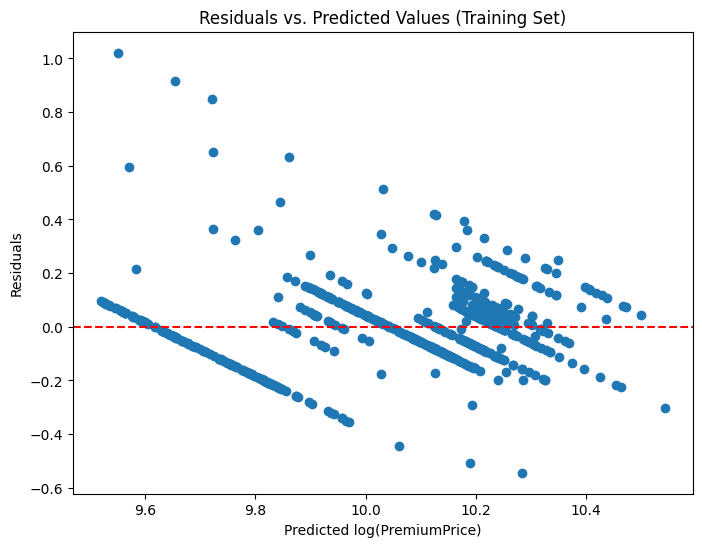


Number of Outliers (Residuals > 2 SD): 30
Outlier Indices: [5, 10, 20, 32, 65, 76, 108, 175, 195, 216, 224, 236, 255, 284, 330, 332, 333, 339, 367, 412, 427, 443, 453, 480, 492, 574, 624, 631, 649, 688]

Variance Inflation Factors (VIF):
                   Feature        VIF
0                    const  24.601779
1                      BMI   1.010682
2           AnyTransplants   1.004224
3       AnyChronicDiseases   1.034191
4  HistoryOfCancerInFamily   1.006258
5             Age_centered   1.014503
6            Age2_centered   1.032987


In [39]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\Project' not found.")
    exit()

# Load training and testing data
try:
    train_df = pd.read_csv(os.path.join('output', 'train.csv'))
    test_df = pd.read_csv(os.path.join('output', 'test.csv'))
    print("\nTraining Dataset Loaded Successfully. Shape:", train_df.shape)
    print("Testing Dataset Loaded Successfully. Shape:", test_df.shape)
except FileNotFoundError:
    print("\nError: 'output/train.csv' or 'output/test.csv' not found. Using in-memory data from Step 4.")
    train_df = pd.concat([X_train, y_train.rename('PremiumPrice')], axis=1)
    test_df = pd.concat([X_test, y_test.rename('PremiumPrice')], axis=1)
    print("\nIn-memory Training Data Shape:", train_df.shape)
    print("In-memory Testing Data Shape:", test_df.shape)

# Prepare training features
X_train = train_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_train = sm.add_constant(X_train)

# Center Age and add Age^2 for non-linearity
X_train['Age_centered'] = train_df['Age'] - train_df['Age'].mean()
X_train['Age2_centered'] = X_train['Age_centered'] ** 2

# Optional: Apply log transformation to PremiumPrice
apply_log = True  # Set to False to use original PremiumPrice
if apply_log:
    y_train = np.log(train_df['PremiumPrice'])
    print("\nApplied log transformation to PremiumPrice due to potential skewness.")
else:
    y_train = train_df['PremiumPrice']

# Fit model
model = sm.OLS(y_train, X_train).fit()
print("\nModel Summary (Centered Age, Iteration 2):")
print(model.summary())

# Predict on training set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"\nMean Squared Error on Training Set: {mse_train:.2f}")

# Prepare testing features and predict
X_test = test_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_test = sm.add_constant(X_test)
X_test['Age_centered'] = test_df['Age'] - train_df['Age'].mean()  # Use training mean
X_test['Age2_centered'] = X_test['Age_centered'] ** 2
if apply_log:
    y_test = np.log(test_df['PremiumPrice'])
else:
    y_test = test_df['PremiumPrice']
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Testing Set: {mse_test:.2f}")

# Residual plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, model.resid)
plt.title('Residuals vs. Predicted Values (Training Set)')
plt.xlabel('Predicted log(PremiumPrice)')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()
plt.close()

# Check for outliers (e.g., residuals > 2 standard deviations)
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()
outlier_threshold = 2
outliers = std_residuals[abs(std_residuals) > outlier_threshold]
print(f"\nNumber of Outliers (Residuals > 2 SD): {len(outliers)}")
if len(outliers) > 0:
    print("Outlier Indices:", outliers.index.tolist())

# Check for multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Step 5 (Iteration 2)

Working Directory Set to: C:\Users\Lewis\Documents\Project

Training Dataset Loaded Successfully. Shape: (690, 9)
Testing Dataset Loaded Successfully. Shape: (296, 9)

Applied log transformation to PremiumPrice due to potential skewness.

Model Summary (Centered Age, Iteration 2):
                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     260.4
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          8.86e-173
Time:                        22:56:48   Log-Likelihood:                 346.91
No. Observations:                 690   AIC:                            -679.8
Df Residuals:                     683   BIC:                            -648.1
Df Model:                           6                                         
Covaria

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lewis\AppData\Local\Temp\ipykernel_21852\3238513577.py:6: SyntaxWarning: invalid escape sequence '\P'
  print("Error: Directory 'C:\\Users\\Lewis\\Documents\Project' not found.")


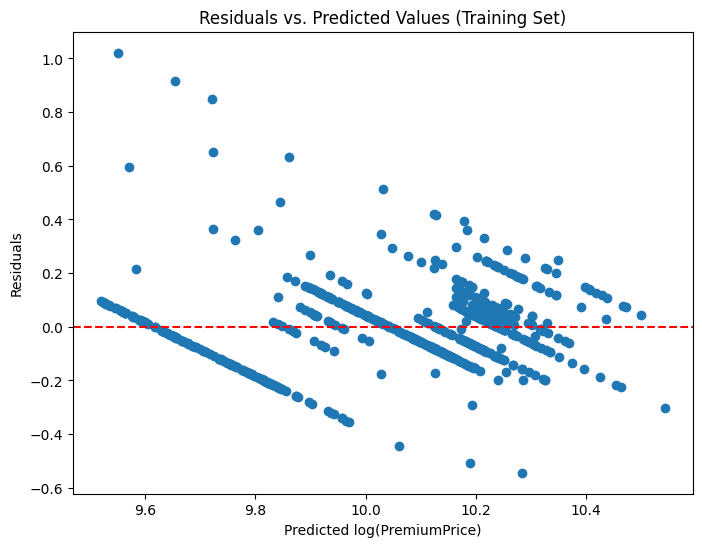


Number of Outliers (Residuals > 2 SD): 30
Outlier Indices: [5, 10, 20, 32, 65, 76, 108, 175, 195, 216, 224, 236, 255, 284, 330, 332, 333, 339, 367, 412, 427, 443, 453, 480, 492, 574, 624, 631, 649, 688]

Variance Inflation Factors (VIF):
                   Feature        VIF
0                    const  24.601779
1                      BMI   1.010682
2           AnyTransplants   1.004224
3       AnyChronicDiseases   1.034191
4  HistoryOfCancerInFamily   1.006258
5             Age_centered   1.014503
6            Age2_centered   1.032987


In [38]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\Project' not found.")
    exit()

# Load training and testing data
try:
    train_df = pd.read_csv(os.path.join('output', 'train.csv'))
    test_df = pd.read_csv(os.path.join('output', 'test.csv'))
    print("\nTraining Dataset Loaded Successfully. Shape:", train_df.shape)
    print("Testing Dataset Loaded Successfully. Shape:", test_df.shape)
except FileNotFoundError:
    print("\nError: 'output/train.csv' or 'output/test.csv' not found. Using in-memory data from Step 4.")
    train_df = pd.concat([X_train, y_train.rename('PremiumPrice')], axis=1)
    test_df = pd.concat([X_test, y_test.rename('PremiumPrice')], axis=1)
    print("\nIn-memory Training Data Shape:", train_df.shape)
    print("In-memory Testing Data Shape:", test_df.shape)

# Prepare training features
X_train = train_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_train = sm.add_constant(X_train)

# Center Age and add Age^2 for non-linearity
X_train['Age_centered'] = train_df['Age'] - train_df['Age'].mean()
X_train['Age2_centered'] = X_train['Age_centered'] ** 2

# Optional: Apply log transformation to PremiumPrice
apply_log = True  # Set to False to use original PremiumPrice
if apply_log:
    y_train = np.log(train_df['PremiumPrice'])
    print("\nApplied log transformation to PremiumPrice due to potential skewness.")
else:
    y_train = train_df['PremiumPrice']

# Fit model
model = sm.OLS(y_train, X_train).fit()
print("\nModel Summary (Centered Age, Iteration 2):")
print(model.summary())

# Predict on training set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"\nMean Squared Error on Training Set: {mse_train:.2f}")

# Prepare testing features and predict
X_test = test_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_test = sm.add_constant(X_test)
X_test['Age_centered'] = test_df['Age'] - train_df['Age'].mean()  # Use training mean
X_test['Age2_centered'] = X_test['Age_centered'] ** 2
if apply_log:
    y_test = np.log(test_df['PremiumPrice'])
else:
    y_test = test_df['PremiumPrice']
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Testing Set: {mse_test:.2f}")

# Residual plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, model.resid)
plt.title('Residuals vs. Predicted Values (Training Set)')
plt.xlabel('Predicted log(PremiumPrice)')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()
plt.close()

# Check for outliers (e.g., residuals > 2 standard deviations)
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()
outlier_threshold = 2
outliers = std_residuals[abs(std_residuals) > outlier_threshold]
print(f"\nNumber of Outliers (Residuals > 2 SD): {len(outliers)}")
if len(outliers) > 0:
    print("Outlier Indices:", outliers.index.tolist())

# Check for multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Step 5 (Iteration 3)

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lewis\AppData\Local\Temp\ipykernel_21852\3826346047.py:6: SyntaxWarning: invalid escape sequence '\P'
  print("Error: Directory 'C:\\Users\\Lewis\\Documents\Project' not found.")


Working Directory Set to: C:\Users\Lewis\Documents\Project

Training Dataset Loaded Successfully. Shape: (690, 9)
Testing Dataset Loaded Successfully. Shape: (296, 9)

Applied log transformation to PremiumPrice due to potential skewness.

Model Summary (Centered Age, Iteration 3):
                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     260.4
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          8.86e-173
Time:                        22:55:59   Log-Likelihood:                 346.91
No. Observations:                 690   AIC:                            -679.8
Df Residuals:                     683   BIC:                            -648.1
Df Model:                           6                                         
Covaria

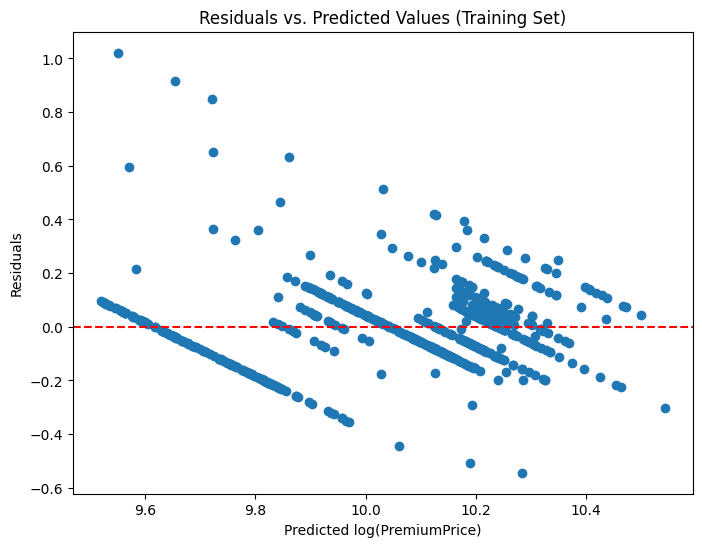


Breusch-Pagan Test for Heteroskedasticity:
LM Statistic: 48.82, p-value: 0.0000, F-value: 8.67, p-value: 0.0000
Evidence of heteroskedasticity (p < 0.05). Consider weighted least squares or transformation.

Variance Inflation Factors (VIF):
                   Feature        VIF
0                    const  24.601779
1                      BMI   1.010682
2           AnyTransplants   1.004224
3       AnyChronicDiseases   1.034191
4  HistoryOfCancerInFamily   1.006258
5             Age_centered   1.014503
6            Age2_centered   1.032987


In [37]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\Project' not found.")
    exit()

# Load training and testing data
try:
    train_df = pd.read_csv(os.path.join('output', 'train.csv'))
    test_df = pd.read_csv(os.path.join('output', 'test.csv'))
    print("\nTraining Dataset Loaded Successfully. Shape:", train_df.shape)
    print("Testing Dataset Loaded Successfully. Shape:", test_df.shape)
except FileNotFoundError:
    print("\nError: 'output/train.csv' or 'output/test.csv' not found. Using in-memory data from Step 4.")
    train_df = pd.concat([X_train, y_train.rename('PremiumPrice')], axis=1)
    test_df = pd.concat([X_test, y_test.rename('PremiumPrice')], axis=1)
    print("\nIn-memory Training Data Shape:", train_df.shape)
    print("In-memory Testing Data Shape:", test_df.shape)

# Prepare training features
X_train = train_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_train = sm.add_constant(X_train)
X_train['Age_centered'] = train_df['Age'] - train_df['Age'].mean()
X_train['Age2_centered'] = X_train['Age_centered'] ** 2

# Apply log transformation to PremiumPrice
y_train = np.log(train_df['PremiumPrice'])
print("\nApplied log transformation to PremiumPrice due to potential skewness.")

# Fit initial model
model = sm.OLS(y_train, X_train).fit()
print("\nModel Summary (Centered Age, Iteration 3):")
print(model.summary())

# Predict on training set and cap outliers
y_train_pred = model.predict(X_train)
residuals = model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()
outlier_threshold = 2
outlier_indices = abs(std_residuals) > outlier_threshold
y_train_capped = y_train.copy()
y_train_capped[outlier_indices] = y_train_pred[outlier_indices]  # Cap outliers to predicted values
mse_train = mean_squared_error(y_train_capped, y_train_pred)
print(f"\nMean Squared Error on Training Set (with capped outliers): {mse_train:.2f}")

# Prepare testing features and predict
X_test = test_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_test = sm.add_constant(X_test)
X_test['Age_centered'] = test_df['Age'] - train_df['Age'].mean()
X_test['Age2_centered'] = X_test['Age_centered'] ** 2
y_test = np.log(test_df['PremiumPrice'])
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Testing Set: {mse_test:.2f}")

# Residual plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, model.resid)
plt.title('Residuals vs. Predicted Values (Training Set)')
plt.xlabel('Predicted log(PremiumPrice)')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()
plt.close()

# Check for heteroskedasticity (Breusch-Pagan test)
bp_test = het_breuschpagan(model.resid, X_train)
print(f"\nBreusch-Pagan Test for Heteroskedasticity:")
print(f"LM Statistic: {bp_test[0]:.2f}, p-value: {bp_test[1]:.4f}, F-value: {bp_test[2]:.2f}, p-value: {bp_test[3]:.4f}")
if bp_test[1] < 0.05:
    print("Evidence of heteroskedasticity (p < 0.05). Consider weighted least squares or transformation.")

# Check for multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Step 5 (Iteration 4)

Working Directory Set to: C:\Users\Lewis\Documents\Project

Training Dataset Loaded Successfully. Shape: (690, 9)
Testing Dataset Loaded Successfully. Shape: (296, 9)

Applied log transformation to PremiumPrice due to potential skewness.

WLS Model Summary (Iteration 4):
                            WLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.696
Model:                            WLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     260.8
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          6.06e-173
Time:                        22:46:22   Log-Likelihood:                 345.05
No. Observations:                 690   AIC:                            -676.1
Df Residuals:                     683   BIC:                            -644.3
Df Model:                           6                                         
Covariance Type: 

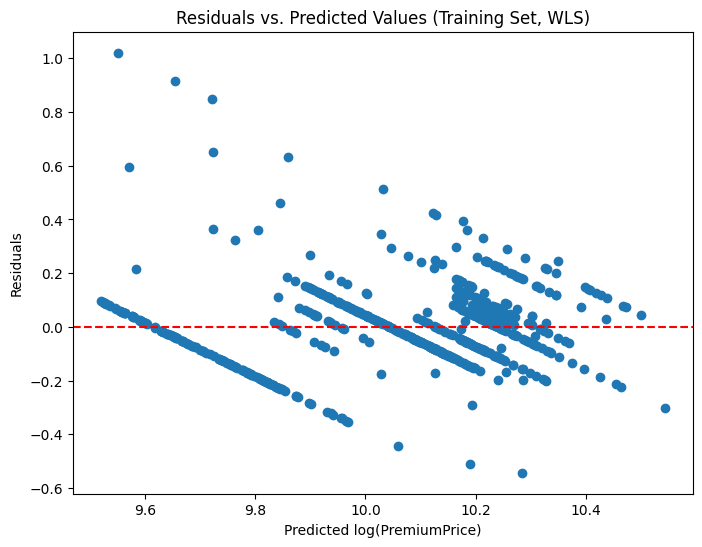


Breusch-Pagan Test for Heteroskedasticity:
LM Statistic: 48.80, p-value: 0.0000, F-value: 8.66, p-value: 0.0000
Evidence of heteroskedasticity (p < 0.05). Consider further model adjustments.

Variance Inflation Factors (VIF):
                   Feature        VIF
0                    const  24.601779
1                      BMI   1.010682
2           AnyTransplants   1.004224
3       AnyChronicDiseases   1.034191
4  HistoryOfCancerInFamily   1.006258
5             Age_centered   1.014503
6            Age2_centered   1.032987


In [34]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\\Project' not found.")
    exit()

# Load training and testing data
try:
    train_df = pd.read_csv(os.path.join('output', 'train.csv'))
    test_df = pd.read_csv(os.path.join('output', 'test.csv'))
    print("\nTraining Dataset Loaded Successfully. Shape:", train_df.shape)
    print("Testing Dataset Loaded Successfully. Shape:", test_df.shape)
except FileNotFoundError:
    print("\nError: 'output/train.csv' or 'output/test.csv' not found. Using in-memory data from Step 4.")
    train_df = pd.concat([X_train, y_train.rename('PremiumPrice')], axis=1)
    test_df = pd.concat([X_test, y_test.rename('PremiumPrice')], axis=1)
    print("\nIn-memory Training Data Shape:", train_df.shape)
    print("In-memory Testing Data Shape:", test_df.shape)

# Prepare training features
X_train = train_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_train = sm.add_constant(X_train)
X_train['Age_centered'] = train_df['Age'] - train_df['Age'].mean()
X_train['Age2_centered'] = X_train['Age_centered'] ** 2

# Apply log transformation to PremiumPrice
y_train = np.log(train_df['PremiumPrice'])
print("\nApplied log transformation to PremiumPrice due to potential skewness.")

# Initial OLS to estimate weights
initial_model = sm.OLS(y_train, X_train).fit()
y_train_pred = initial_model.predict(X_train)
weights = 1 / np.sqrt(y_train_pred)  # Inverse of predicted values as weights

# Fit weighted least squares (WLS) model
wls_model = sm.WLS(y_train, X_train, weights=weights).fit()
print("\nWLS Model Summary (Iteration 4):")
print(wls_model.summary())

# Predict on training set and cap outliers
y_train_pred_wls = wls_model.predict(X_train)
residuals = wls_model.resid
std_residuals = (residuals - residuals.mean()) / residuals.std()
outlier_threshold = 2
outlier_indices = abs(std_residuals) > outlier_threshold
y_train_capped = y_train.copy()
y_train_capped[outlier_indices] = y_train_pred_wls[outlier_indices]  # Cap outliers
mse_train = mean_squared_error(y_train_capped, y_train_pred_wls)
print(f"\nMean Squared Error on Training Set (with capped outliers): {mse_train:.2f}")

# Prepare testing features and predict
X_test = test_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_test = sm.add_constant(X_test)
X_test['Age_centered'] = test_df['Age'] - train_df['Age'].mean()
X_test['Age2_centered'] = X_test['Age_centered'] ** 2
y_test = np.log(test_df['PremiumPrice'])
y_test_pred_wls = wls_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_wls)
print(f"\nMean Squared Error on Testing Set: {mse_test:.2f}")

# Residual plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred_wls, wls_model.resid)
plt.title('Residuals vs. Predicted Values (Training Set, WLS)')
plt.xlabel('Predicted log(PremiumPrice)')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()
plt.close()

# Check for heteroskedasticity (Breusch-Pagan test)
bp_test = het_breuschpagan(wls_model.resid, X_train)
print(f"\nBreusch-Pagan Test for Heteroskedasticity:")
print(f"LM Statistic: {bp_test[0]:.2f}, p-value: {bp_test[1]:.4f}, F-value: {bp_test[2]:.2f}, p-value: {bp_test[3]:.4f}")
if bp_test[1] < 0.05:
    print("Evidence of heteroskedasticity (p < 0.05). Consider further model adjustments.")

# Check for multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Step 6

In [41]:
# Set working directory
try:
    os.chdir(r'C:\Users\Lewis\Documents\Project')
    print("Working Directory Set to:", os.getcwd())
except FileNotFoundError:
    print("Error: Directory 'C:\\Users\\Lewis\\Documents\\Project' not found.")
    exit()

# Load training and testing data
try:
    train_df = pd.read_csv(os.path.join('output', 'train.csv'))
    test_df = pd.read_csv(os.path.join('output', 'test.csv'))
    print("\nTraining Dataset Loaded Successfully. Shape:", train_df.shape)
    print("Testing Dataset Loaded Successfully. Shape:", test_df.shape)
except FileNotFoundError:
    print("\nError: 'output/train.csv' or 'output/test.csv' not found.")
    exit()

# Prepare training features
X_train = train_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_train = sm.add_constant(X_train)
X_train['Age_centered'] = train_df['Age'] - train_df['Age'].mean()
X_train['Age2_centered'] = X_train['Age_centered'] ** 2

# Apply log transformation to PremiumPrice
y_train = np.log(train_df['PremiumPrice'])

# Initial OLS to estimate weights
initial_model = sm.OLS(y_train, X_train).fit()
y_train_pred = initial_model.predict(X_train)
weights = 1 / np.sqrt(y_train_pred)

# Fit WLS model
wls_model = sm.WLS(y_train, X_train, weights=weights).fit()

# Prepare testing features and predict
X_test = test_df[['BMI', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily']]
X_test = sm.add_constant(X_test)
X_test['Age_centered'] = test_df['Age'] - train_df['Age'].mean()
X_test['Age2_centered'] = X_test['Age_centered'] ** 2
y_test = np.log(test_df['PremiumPrice'])
y_test_pred_wls = wls_model.predict(X_test)

# Exponentiate to original scale
y_test_pred_original = np.exp(y_test_pred_wls)
y_test_original = np.exp(y_test)

# Display sample predictions vs. actuals
sample_size = 5
print("\nSample Predictions vs. Actual PremiumPrice (Original Scale):")
for i in range(sample_size):
    print(f"Sample {i+1}: Predicted = {y_test_pred_original[i]:.2f}, Actual = {y_test_original[i]:.2f}")

# Compute metrics on original scale
mse_test_original = mean_squared_error(y_test_original, y_test_pred_original)
print(f"\nMean Squared Error on Testing Set (Original Scale): {mse_test_original:.2f}")

Working Directory Set to: C:\Users\Lewis\Documents\Project

Training Dataset Loaded Successfully. Shape: (690, 9)
Testing Dataset Loaded Successfully. Shape: (296, 9)

Sample Predictions vs. Actual PremiumPrice (Original Scale):
Sample 1: Predicted = 28723.97, Actual = 31000.00
Sample 2: Predicted = 26256.16, Actual = 31000.00
Sample 3: Predicted = 28067.12, Actual = 29000.00
Sample 4: Predicted = 19588.54, Actual = 15000.00
Sample 5: Predicted = 26489.49, Actual = 23000.00

Mean Squared Error on Testing Set (Original Scale): 12531667.25
